In [44]:
# импорт необходимых библиотек для обработки и анализа данных
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# загрузка файла в Pandas DataFrame
df = pd.read_csv('supermarket_sales - Sheet1.csv', delimiter=',')

In [46]:
# проверка загруженных данных
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [47]:
# проверка типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [48]:
# проверка строк DataFrame на дубликаты
df.duplicated().any()

False

In [49]:
# воспользуемся методом Pandas .describe() для генерации статистики по всем столбцам

df.describe(include='all')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,19:48,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,NaN,307.58738,4.761905e+00,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,NaN,234.17651,6.131498e-14,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,NaN,10.17000,4.761905e+00,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,NaN,118.49750,4.761905e+00,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,NaN,241.76000,4.761905e+00,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,NaN,448.90500,4.761905e+00,22.445250,8.50000


In [50]:
print(df['Branch'].unique())
print(df['City'].unique())
print(df['Customer type'].unique())
print(df['Gender'].unique())
print(df['Product line'].unique())
print(df['Payment'].unique())

['A' 'C' 'B']
['Yangon' 'Naypyitaw' 'Mandalay']
['Member' 'Normal']
['Female' 'Male']
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
['Ewallet' 'Cash' 'Credit card']


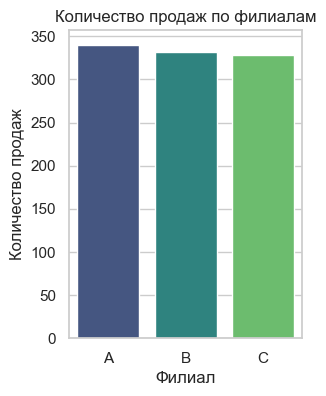

In [51]:
# построение столбчатой диаграммы по продажам в филиалах

# группировка данных
branch_stat = df.groupby('Branch').nunique().reset_index()

# построение графика
plt.figure(figsize=(3, 4))
sns.set(style="whitegrid")
sns.barplot(x='Branch', y='Invoice ID', data=branch_stat, palette="viridis")

plt.title('Количество продаж по филиалам')
plt.xlabel('Филиал')
plt.ylabel('Количество продаж')

plt.show()

In [52]:
average_percentage_difference = (branch_stat['Invoice ID'].max() - branch_stat['Invoice ID'].min()) / branch_stat['Invoice ID'].mean() * 100
print('Разница составляет: ', average_percentage_difference.round(3), '%')

Разница составляет:  3.6 %


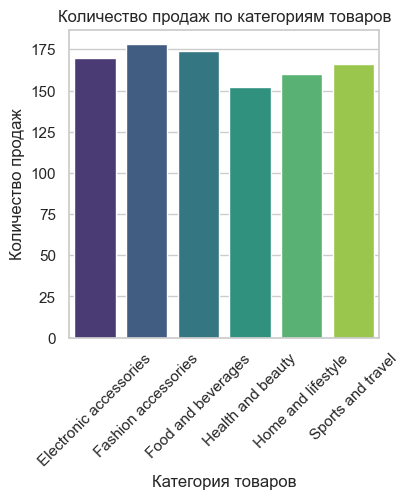

In [53]:
# распределение заказов по категориям продуктов

product_line_stat = df.groupby('Product line')['Invoice ID'].nunique().reset_index()

plt.figure(figsize=(4, 4))
sns.set(style="whitegrid")
sns.barplot(x='Product line', y='Invoice ID', data=product_line_stat, palette="viridis")

plt.title('Количество продаж по категориям товаров')
plt.xlabel('Категория товаров')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45, ha='center')

plt.show()

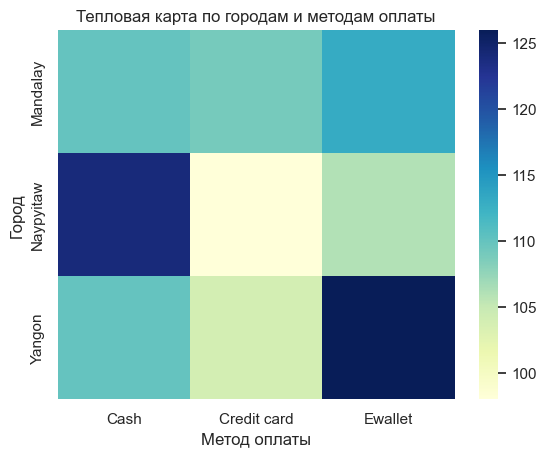

In [54]:
# Построение тепловой карты
sns.heatmap(pd.crosstab(df['City'], df['Payment']), cmap="YlGnBu")

plt.title('Тепловая карта по городам и методам оплаты')
plt.xlabel('Метод оплаты')
plt.ylabel('Город')

plt.show()